\date{Nov 10, 2024}<br>
*这一笔记简要概述了神经网络的基本运行逻辑及应用，是自理解和总结的“压缩知识”，无法保证内容的全面性和完全正确。*<br>
*笔记整理的目的是简要总结并上手应用。因此正如标题所说的“图解的直觉”，选择了直接切入并结合直观图示，而非系统性的从背景和发展脉络进行引入和剖析。*<br>
*笔记中所有的图源于网络、自截图或Chengjun Wang的github仓库*<p>
*关于从感知机到神经网络的发展脉络，以及其运行原理的具象讲解，b站的这个视频做的非常棒，容易理解：https://www.bilibili.com/video/BV1atCRYsE7x/?spm_id_from=333.1007.top_right_bar_window_custom_collection.content.click&vd_source=d8eecc19da121bfcaa8d0345f72b7c16*

# 1. 图解神经网络 (neutral network) 基本运行过程的直觉

## 1.1 概述
直入主题，从直觉上理解神经网络是很简单的。概括来说，神经网络运行的过程其实就是模拟了生物神经元的信号传递过程，在多个神经元上做线性回归，通过不断的学习调整以使得输出结果无限接近真实值。但由于线性回归拟合现实能力较弱，需要对其添加非线性的环节（添加非线性特征或非线性的激活函数）。<br>
>因此，neutral network可以简单理解为**经过非线性变换的回归分析**，核心是 **“迭代”**。

从具体过程来说，神经网络的运作可以简要分为三个步骤：1、不同强度的信号被加总（输入值×权重） 2、对信号做判断，若超过阈值则继续传递给下一层的神经元（激活函数的非线性变化） 3、信号经过最后的传递和加总成为最终输出（再次重复乘上权重的过程）<p>
如下图所示，这是一个简单的人工神经网络（ANN)，可以看到它主要由三部分构成：输入层、隐藏层、输出层（input layer, hidden layer, output layer），层与层之间的连接上有权重w（weights）。对应一下生物的神经元细胞，那么输入层即模拟了多个/单个树突向细胞体输入信号；信号乘上对应权重w后被汇总到隐藏层，即模拟了生物细胞体对不同强度的信号进行汇总积累的过程；隐藏层中对加权求和的值使用激活函数计算活性值，即模拟了细胞体是产生兴奋or抑制；最后再次重复乘权重得到输出值即模拟了该兴奋/抑制信号传出的结果。

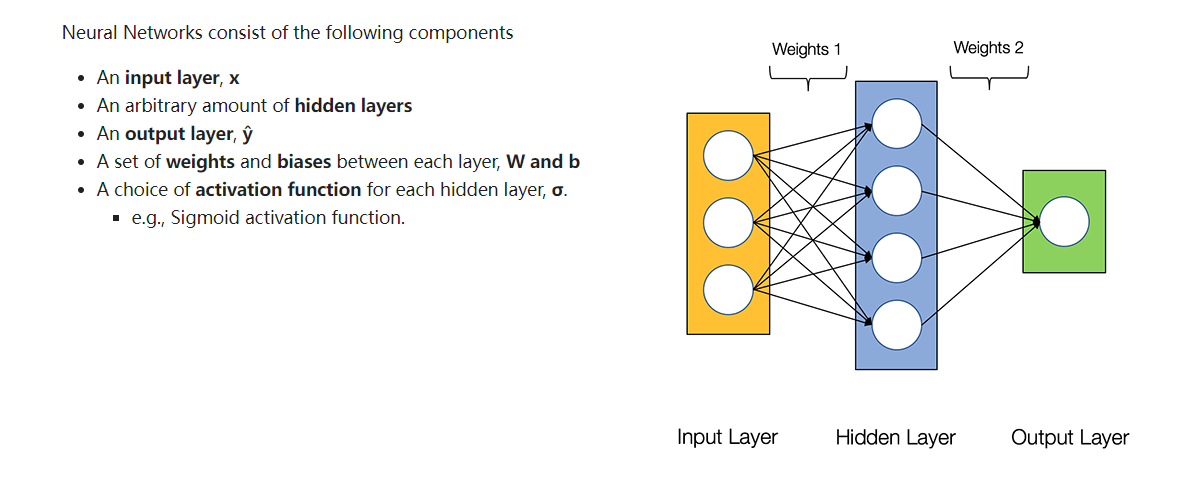<br>
**<center>Fig1. Components of neural network</center>**

为了更直观的理解这一过程，我们对这个简单的神经网络进行横向过程拆解，并用简单的公式对其进行呈现，如下图所示：<br>
其中，${x_i}$为输入值，${W_i}$和${b_i}$为初始权重和偏置项（bias），${\hat{y}}$为输出值，Loss为损失函数；从输入到输出的这一路径我们称之为“向前传输”（Feed forward）。在向前传输的过程中，神经网络首先将初始的输入、权重和截距项进行简单的线性组合（加权求和）后（得到$z$），再将这一结果乘上一个激活函数${σ}$对其进行非线性变化（当然，激活函数也可以是线性函数，但通常我们需要非线性函数以更好的拟合），再通过重复计算得到输出值${\hat{y}}$。<br>
不过，可想而知的是，由于初始权重和偏置项均为随机数，这样算出的输出值自然是错的离谱。因此我们添加了一个环节和反向的传输路径——Loss损失函数的计算与后向传输（Back propagation）。这里的损失函数其实就是各种类型的误差度量，例如线性回归中的均方误差 MSE。那么，在计算损失函数后，将这一结果向后传输，如果Loss非常大，那么后向传输就会让神经网络不断调整初始$W$与$b$来重复向前传输的计算过程，最后使得Loss最小，就能够得到最优解。


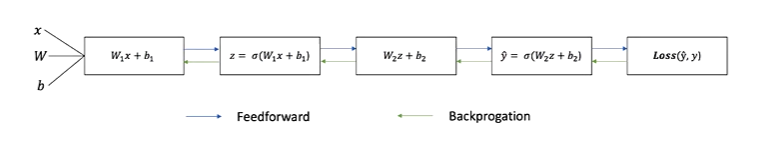<br>
**<center>Fig2. Diagram of the process</center>**

## 1.2. 迭代与优化
基于以上概述，我们进一步对后向传输减小Loss这一路径具体说明：在用初始权重和偏置项计算得到Loss损失函数后，神经网络具体是如何得以调整权重和偏置项使Loss减小的？

在较为复杂的模型和非线性关系的建模中，我们无法像我们对线性回归那样直接求解使损失函数**全局最小的参数组合**（对于线性回归，我们可以直接使用最小二乘法求得解析解使损失函数对权重的偏导为0）。因此，我们通常需要采用基于梯度的优化算法（如梯度下降、随机梯度下降、Adam等）来迭代地调整参数，以逼近损失函数的最小值。这些算法通过计算损失函数相对于每个参数的梯度，来指导参数的更新方向和步长，经过多次迭代后，逐渐找到损失函数的**局部最小值**。<br>

*需要补充的是，训练神经网络通常涉及非凸优化，因为网络的误差表面是高度非凸的，这也是为什么上面提到梯度下降仅能够逐渐找到损失函数的**局部最小值**。我并不太了解数学上的非凸优化问题，这里仅借用网友的解答以及Y. Nesterov（凸优化领域的全球领军人）著书的原句引用来对**为什么要用迭代算法求解**这一问题进行简单阐释* https://www.zhihu.com/question/267021131?sort=created
> In general, optimization problems are unsolvable.——Y. Nesterov
>>对于一个一般优化问题是不可能找到解析解的，或者说精确解，我们在只能寻找其数值近似解，而任何数值近似解都不能使得最优化问题达到最优，而只能达到某种程度的近似。在此基础上，梯度法之类的算法为解决问题提供了出路，即我们放弃彻底求解的幻想，而是一步步寻找更好的近似，最终能找到什么样的近似解取决于迭代的步数和目标函数本身的特性。

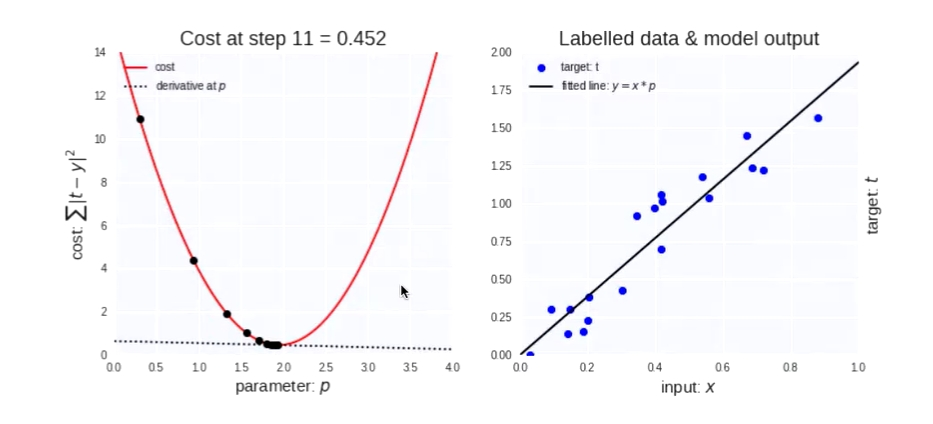
**<center>Fig3. Gradient descent</center>**

让我们回顾一下梯度的知识，对于一个多变量函数，它的梯度即为各个参数方向偏导数的组合向量，指向参数空间中增长最快的方向。<p>为了方便理解，这里我们还是以一个线性回归作为例子（如上图），其拟合曲线$y=xp$，初始参数$p$即我们需要调整的拟合曲线斜率（也即神经网络中的权重$W$）。现在我们希望最小化损失函数，那么就需要沿着梯度的反方向迭代更新参数（这里是为了用简化的模型理解梯度下降，因此不考虑直接求解），为此将损失函数的梯度记作：<br><center>$∇_p{cost}=\frac{\partial{cost}}{\partial{p}}$</center>表示当$p$发生微小变化时，损失函数值变化的速率。  那么对于更新参数$p$的规则有：<br> <center>$p:p-α(\frac{\partial{cost}}{\partial{p}})$</center>其中，α是学习率，表示每次迭代时参数更新的步长，若太大则可能跳过损失函数最小值，太小又会迭代的很慢。<br>
可以看到，上左图中的黑色点即参数$p$迭代的运动轨迹，随着迭代次数的增加，梯度趋近于0，损失函数不断减小，最后得到最优参数$p$代入拟合函数求得$y$。

______________________________________________________________________________________________________________________________________

以上仅是一个最简单的线性回归，那么对于神经网络中涉及非常复杂的非线性函数组合，要如何求得其梯度？求解的核心概念在上面b站的视频中讲解的非常清晰，这里我结合视频中的图对其重新组织表达：<br>
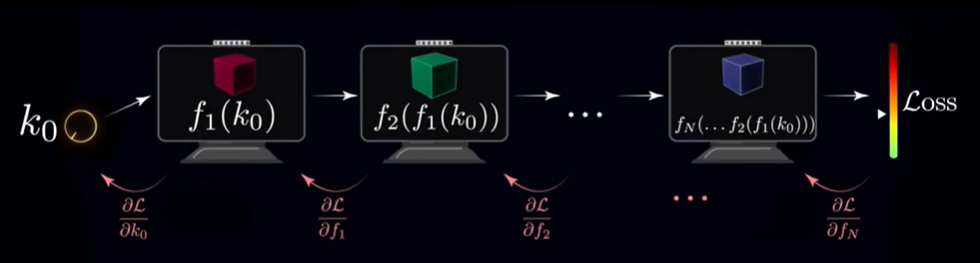
**<center>Fig4. back propagation</center>**

如上图所示，输入值$k_0$经过一系列函数变换$f1,f2,...f_N$，每一步的输出成为下一步的输入，直到最后一步$f_N$的输出被用于计算损失函数$L$。因此，可以说每个函数$fn$的输出不仅影响最终的损失$L$，还影响它后面的所有函数的输出。所以当计算损失函数相对于某个参数的梯度时，我们需要考虑这个参数通过所有后续函数对损失的影响。这一过程的计算核心即为：**链式求导法则**，它的含义是逐步计算每个函数的导数并将它们相乘，从而得到**损失函数相对于每个参数的梯度**。公式表达则为：<br>
<center>$ \frac{\partial \mathcal{L}}{\partial k_0}=\frac{\partial \mathcal{L}}{\partial f_N} \cdot \frac{\partial f_N }{\partial f_{N-1}} \cdot \ldots \cdot \frac{\partial \mathcal{f_2}}{\partial f_1} \cdot \frac{\partial f_1}{\partial {k_0}}$</center><br>
进而使用梯度下降法，每次让参数变化一点点（Δ）向着梯度相反方向移动。

# 2. Deep neural network

前述图解总结阐释了最简单的神经网络结构的运行过程，随之而来的一个问题是，面对较为复杂的数据和任务，以上基本结构的神经网络（只有一个隐藏层和少量神经单元的结构）还能够很好的拟合一个函数并得到准确度较高的解吗？<br>
针对这一问题，最初学者们的想法是增加神经网络的“宽度”，即隐藏层中神经单元的个数。这一思路虽然能够让神经网络学习到更多的特征，但是也存在过拟合和计算成本高的问题。因而，另一个思路是将神经网络做“深”，即增加隐藏层的层数，使得网络能够经过更多非线性变换，以学习到更复杂的数据表示。这就诞生了——deep neural network，其结构如下图所示，相较于Fig1的简单神经网络结构，deep neural network有三层隐藏层神经元，使其能够学习更为复杂的函数。

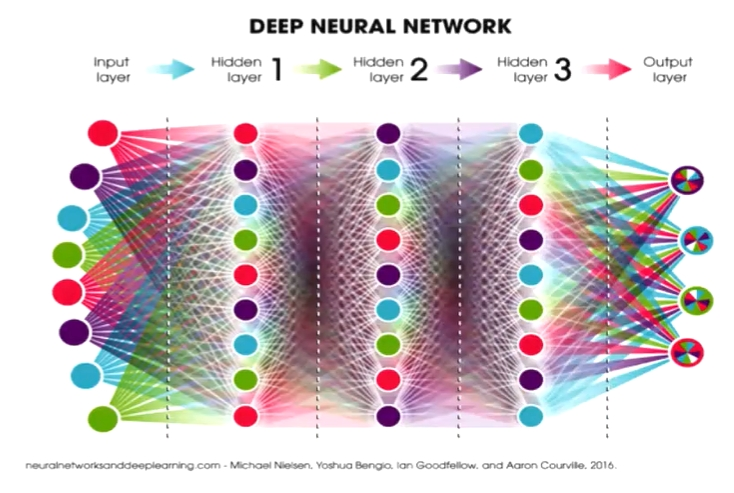
**<center>Fig5. Deep neural network</center>**

为了直观的演示为什么考虑把网络做深在某些情况下是更优的一种思路，这里我使用tensorflow网站上的分类动态图示来辅助阐释：<br> 网址：https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=8&seed=0.03623&showTestData=false&discretize=false&percTrainData=60&x=true&y=true&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false

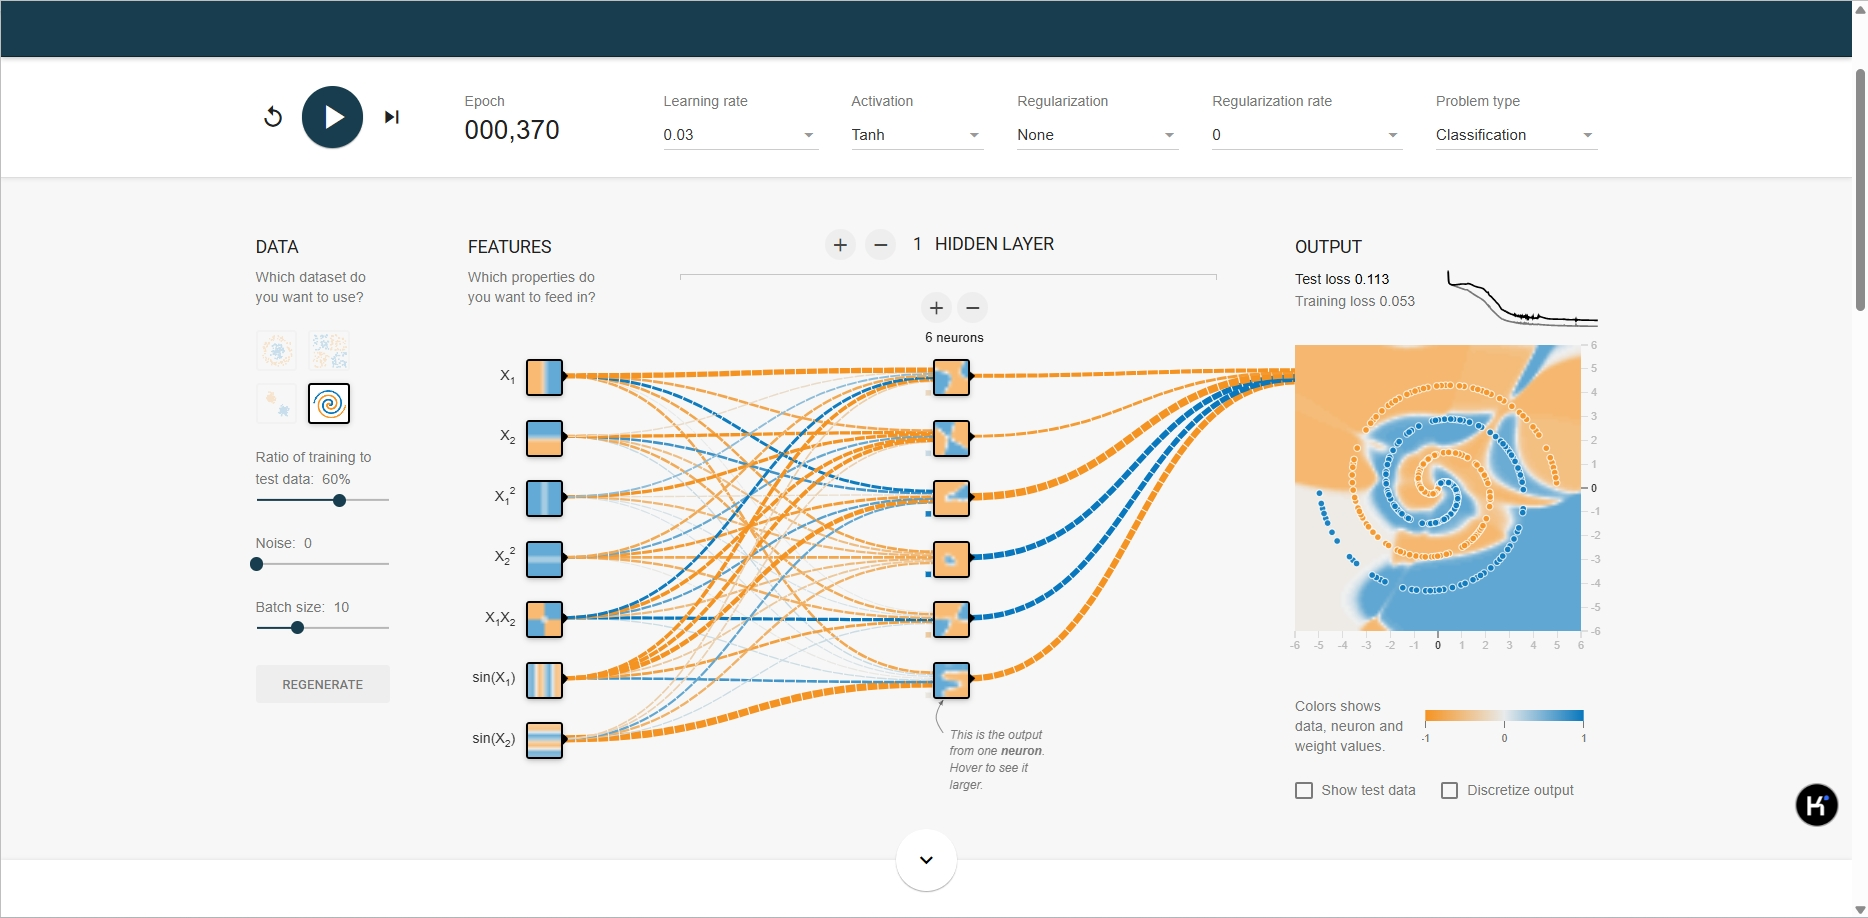
**<center>Fig5. Classification test1</center>**

如Fig5所示，我选用了激活函数Tanh，使用60%的数据作为训练集，并且将7个输入特征都选中了（也就是7个特征函数，例如$x_1$就是纵轴，$x_2$就是横轴）。面对右边output图像中这一呈螺旋型的数据点分布，仅使用一个隐藏层，6个神经单元的神经网络，在重复370次后仍难以完全对其进行分类，其Loss值为0.113。

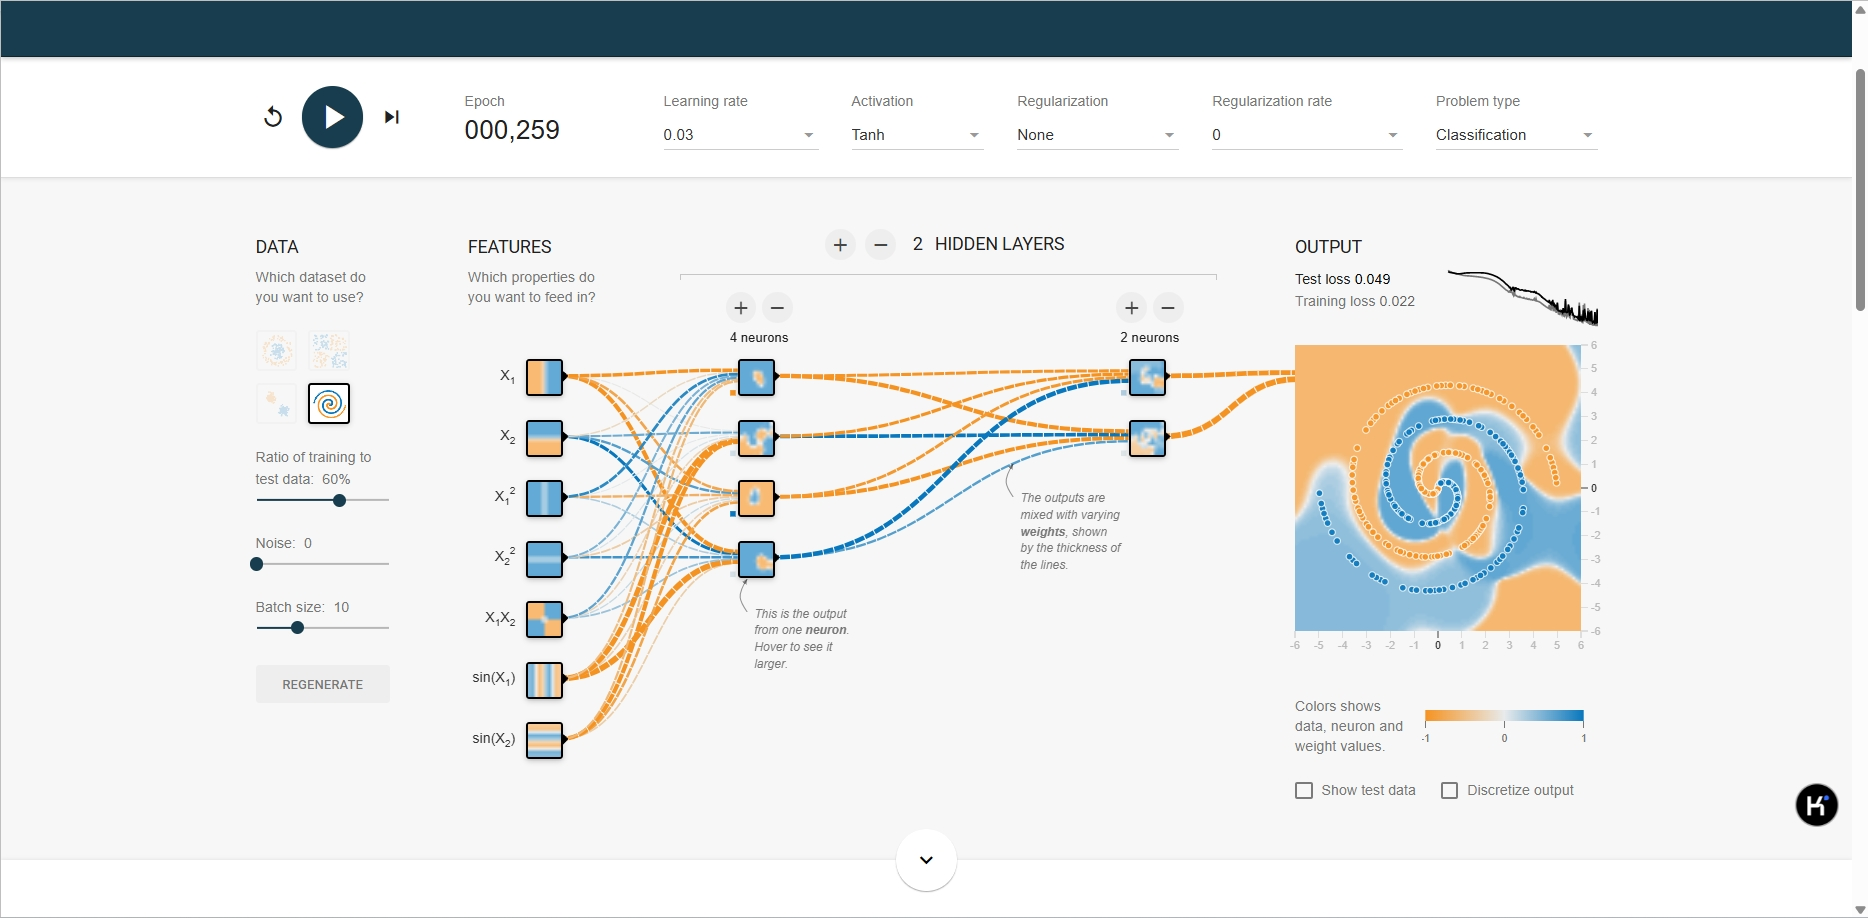
**<center>Fig6. Classification test2</center>**

再如上图Fig6所示，其它参数保持不变的情况下，添加一层隐藏层，并使隐藏层整体神经元个数与上一次测试相等（均为总共6个）。这次右侧output的结构基本可以实现两种数据的分类，且仅经过259次，Loss值就降至0.049。**可见在一些复杂问题上，相较于“更宽”的神经网络结构，“更深”的神经网络结构的拟合精准度更高且耗费的算力更小。**

# 3. 实操

## 3.1 python库
目前我了解的，也是当前网上一搜神经网络训练代码使用的相对较多的三个库：**Pytorch, tensorflow, Keras**<br>
*注：要下载pytorch，先去官网https://pytorch.org/get-started/locally/ 选择自己对应的电脑配置和所需，复制给到的运行命令下载即可。例如我的电脑没有NVIDIA的gpu，因此选择不选择CUDA而用cpu：*[windows+conda+python+cpu] <br> 以下是install command（选了conda就复制到anaconda prompt中即可）:

In [ ]:
conda install pytorch torchvision torchaudio cpuonly -c pytorch

如果不知道自己电脑的具体配置，可以按Ctrl + Shift + Esc快捷键打开任务管理器，点击[性能]查看。<p>
如果选择使用tensorflow的keras，那么可以不用查看具体配置。如下面代码所示，这里我们直接用代码配置tensorflow的环境，并打印出能用的gpu设备，若输出列表是空的则说明无可用gpu（我这里输出即为空）。

In [2]:
from tensorflow       import keras
from tensorflow.keras import layers,models  #这一行也可以不管，从tensorflow.keras模块中导入layers(层)和models(模型)用于构建和训练模型
import tensorflow        as tf
 
gpus = tf.config.list_physical_devices("GPU")
 
if gpus:
    gpu0 = gpus[0]                                        #如果有多个GPU，仅使用第0个GPU
    tf.config.experimental.set_memory_growth(gpu0, True)  #设置GPU显存用量按需使用
    tf.config.set_visible_devices([gpu0],"GPU")
    
gpus

[]

## 3.2 基本命令